In [1]:
using DrWatson
@quickactivate "sst-mot-analysis"

import DrWatson: datadir, srcdir
import DrWatson: @quickactivate
include(srcdir("compare_random_samples.jl"))

using GH19, TMI, PythonCall, Revise
using CSV, DataFrames

 takes about 10 minutes
Theta_OPT-0015.nc already downloaded; use `force=true` to re-download
Theta_anom_OPT-0015.nc already downloaded; use `force=true` to re-download


In [9]:
surfacedepth(γ) = γ.depth[surfaceindex(γ)]
function iswetloc(loc, γ1::Grid, γ2::Grid)
    if length(loc) < 3
        max_depth = maximum([surfacedepth(γ1), surfacedepth(γ2)])
        loc3 = (loc..., max_depth)
        return (iswet(loc3,γ1) * iswet(loc3,γ2)) 
    elseif length(lo) == 3
        return (iswet(loc,γ1) * iswet(loc,γ2)) 
    end
end

iswetloc(x) = iswetloc(x, γ_lgm, γ_PI)

iswetloc (generic function with 2 methods)

In [10]:
# Configure LGM dataset
TMIversion_lgm = "LGM_90x45x33_G14"
A_lgm, Alu_lgm, γ_lgm, TMIfile_lgm, L_lgm, B_lgm = config(TMIversion_lgm);

# Configure PI dataset
TMIversion_PI = "modern_180x90x33_GH11_GH12"
A_PI, Alu_PI, γ_PI, TMIfile_PI, L_PI, B_PI = config(TMIversion_PI);

Form water-mass matrix A
  0.024952 seconds (1.99 k allocations: 26.437 MiB)
LU factorization of A
  0.328172 seconds (88 allocations: 305.263 MiB, 3.36% gc time)
circulation matrix L=
  0.001491 seconds (333 allocations: 26.828 KiB)
Boundary matrix B=
  0.000892 seconds (332 allocations: 26.805 KiB)
Form water-mass matrix A
  0.044611 seconds (5.23 k allocations: 118.943 MiB)
LU factorization of A
  4.221329 seconds (89 allocations: 2.810 GiB, 0.29% gc time)
circulation matrix L=
  0.130338 seconds (8.14 M allocations: 224.520 MiB, 6.86% gc time)
Boundary matrix B=
  0.013274 seconds (6.14 k allocations: 7.270 MiB)


In [12]:
OC3_locs_df = DataFrame(CSV.File(datadir("clark2024.csv")))[:, 2:end]
OC3_resolution = OC3_locs_df[!, 8]
OC3_locs_df = OC3_locs_df[OC3_resolution .<= 4, :]
OC3_lons = OC3_locs_df[!, 2]
OC3_lons[OC3_lons .< 0.0] .+= 360

OC3_lats = OC3_locs_df[!, 1]

nOC3_locs = size(OC3_locs_df, 1)

OC3_locs = Vector{Tuple{Float64, Float64}}(undef, nOC3_locs)

[OC3_locs[i] = (OC3_lons[i], OC3_lats[i]) for i in eachindex(OC3_locs)]
            
OC3_locs = unique(OC3_locs[iswetloc.(OC3_locs)]);
OC3_locs

80-element Vector{Tuple{Float64, Float64}}:
 (335.9, 61.4)
 (339.7, 53.5)
 (335.8, 49.9)
 (333.5, 44.4)
 (349.9, 43.2)
 (327.5, 41.0)
 (327.0, 41.0)
 (350.1, 40.6)
 (350.14, 40.58)
 (349.3, 39.0)
 (349.8, 37.9)
 (349.87, 37.57)
 (236.7, 37.0)
 ⋮
 (79.4, -42.5)
 (9.0, -42.9)
 (9.0, -43.0)
 (79.9, -43.5)
 (51.3, -43.8)
 (149.9, -44.0)
 (174.9, -45.5)
 (96.5, -46.0)
 (174.9, -45.2)
 (88.0, -46.5)
 (73.3, -55.0)
 (244.9, -56.1)

In [13]:
Nboot = 1000
N_sample = length(OC3_locs)
OC3_locs_sampl_results  = bootstrap_PI_lgm_differences(N_sample, Nboot; locs = OC3_locs);

Form water-mass matrix A
  0.035319 seconds (1.99 k allocations: 26.437 MiB, 42.90% gc time)
LU factorization of A
  0.323978 seconds (88 allocations: 305.263 MiB, 1.12% gc time)
circulation matrix L=
  0.001716 seconds (333 allocations: 26.828 KiB)
Boundary matrix B=
  0.001070 seconds (332 allocations: 26.805 KiB)
Form water-mass matrix A
  0.032602 seconds (5.23 k allocations: 118.943 MiB)
LU factorization of A
  4.033906 seconds (91 allocations: 2.810 GiB, 0.71% gc time)
circulation matrix L=
  0.126414 seconds (8.14 M allocations: 224.520 MiB)
Boundary matrix B=
  0.011782 seconds (6.14 k allocations: 7.270 MiB)
Form water-mass matrix A
  0.037389 seconds (5.23 k allocations: 118.943 MiB, 27.89% gc time)
LU factorization of A
  4.773924 seconds (88 allocations: 2.810 GiB, 0.61% gc time)
circulation matrix L=
  0.141667 seconds (8.14 M allocations: 224.520 MiB)
Boundary matrix B=
  0.012667 seconds (6.14 k allocations: 7.270 MiB)


Running 1000 MC trials (n=80).. 100%|████████████████████| Time: 0:00:40


dSST-TMI: 4.74410414473183
dMOT-TMI: 2.2927657013211613


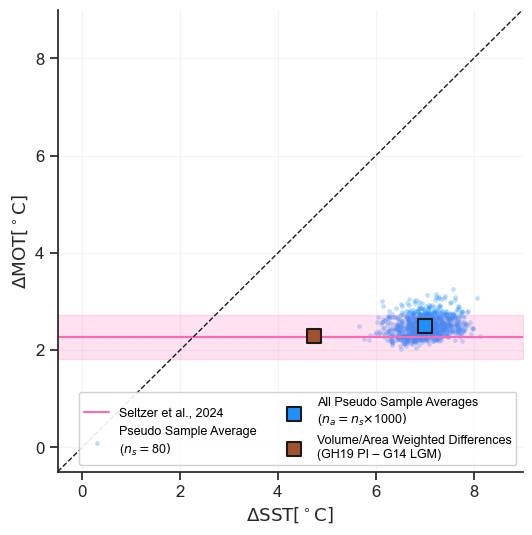

In [17]:
generate_temperature_difference_plot(
    OC3_locs_sampl_results,
    :uniform, N_sample, Nboot, plotsdir("S1.LGM_PI_Temp_diff_weighted_OC3_samples.png"); xlims = (-0.5, 9)
);